# Step 0: import packages and data  

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/DS_studygroup/week1-conversation_rate"

Mounted at /content/drive
/content/drive/MyDrive/DS_studygroup/week1-conversation_rate


In [3]:
import pandas as pd
import numpy as np
import plotnine 
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('data/conversion_project.csv')

# Step 1: observe data and preprocess

In [5]:
print(df.shape)
df.head()

(316200, 6)


,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [10]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316196.000000,316196.000000,316196.000000,316196.000000
mean,30.569011,0.685470,4.872933,0.032252
std,8.268123,0.464329,3.341056,0.176669
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,73.000000,1.000000,29.000000,1.000000


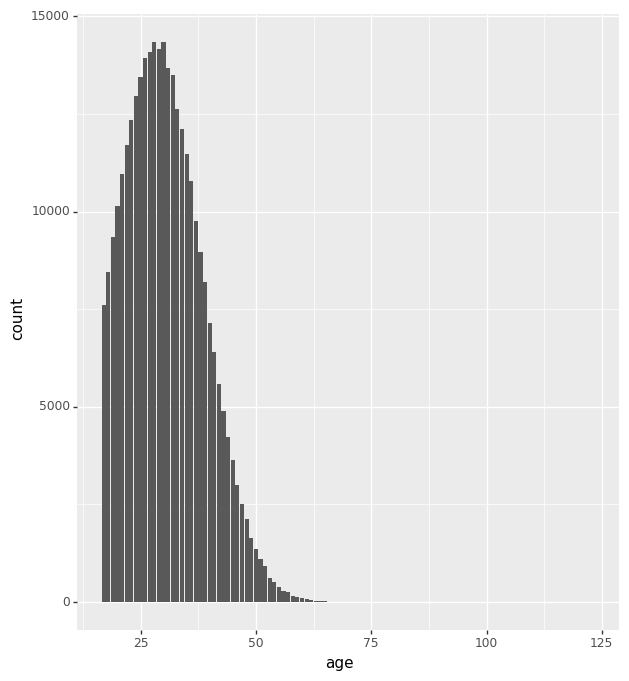

<ggplot: (8738209086629)>

In [7]:
ggplot(df) + aes(x="age")  + geom_bar() + theme(figure_size=(7, 8)) 

## preprocess

chan converted data type to categorical

In [38]:
df['converted'] = df['converted'].astype('category')
df['new_user'] = df['new_user'].astype('category')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## remove outlier

In [8]:
# check the data amount for age over 75 or smaller than 16
df[ (df.age> 75) | (df.age<16)]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
192644,US,77,0,Direct,4,0
265167,US,79,1,Direct,1,0
295581,UK,111,0,Ads,10,1


In [9]:
print(len(df))
df = df[ (df.age <75) & (df.age>16)]
print(len(df))


316200
316196


## create a new indicator to split age levels
* <30: 0 youth
* 30-45: 1 adult 
* 45-65: 2 middle-aged
* \>65: 3 elder


In [39]:
bins= [0,30,40,65,100]
labels = ["<30","30-45", "45-65", ">65"]
df['AgeGroup'] = pd.cut(df.age, bins=bins, labels=labels, right=False)
df['AgeGroup'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<30      153505
30-45    115467
45-65     47183
>65          41
Name: AgeGroup, dtype: int64

# Step3: check the correlation between columns

In [65]:
def converted_bar_chart(data, target):
    plot =  (ggplot(data, aes('factor('+target + ')', fill='factor(converted)')) + geom_bar(position='dodge2')+
                labs( title="different "+target + " converted ", x=target, y = "numbers") +
                geom_text(
                aes(
                    label=after_stat('count / sum(count) * 100'),
                    y=stage(after_stat='count', after_scale='y + 0.25'),
                ),
                stat='count',
                position=position_dodge2(width=0.9),
                format_string='{:.1f}%',
                size=9,
            ))
    return plot

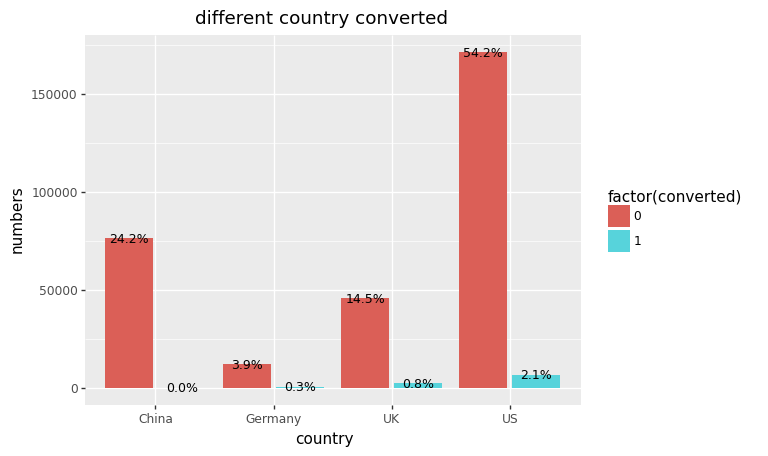

<ggplot: (8738205217333)>

In [66]:
converted_bar_chart(df, 'country')

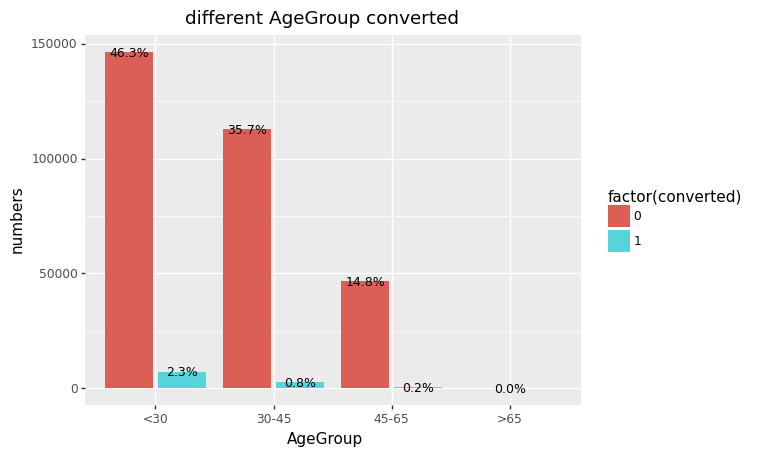

<ggplot: (8738206333421)>

In [67]:
converted_bar_chart(df, 'AgeGroup')

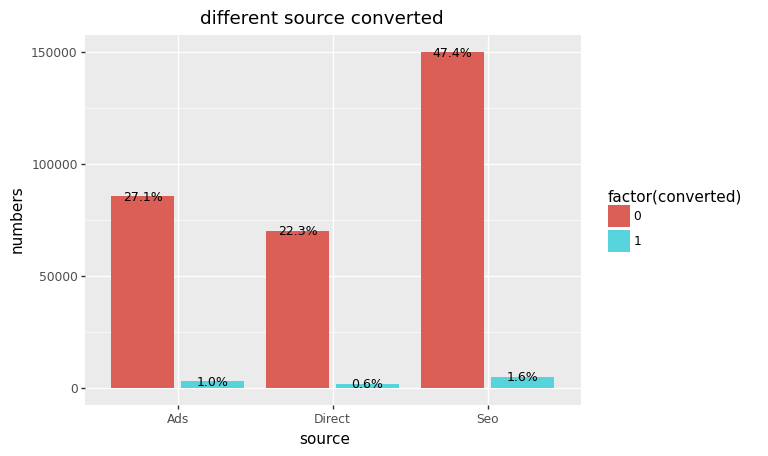

<ggplot: (8738206326969)>

In [68]:
converted_bar_chart(df, 'source')

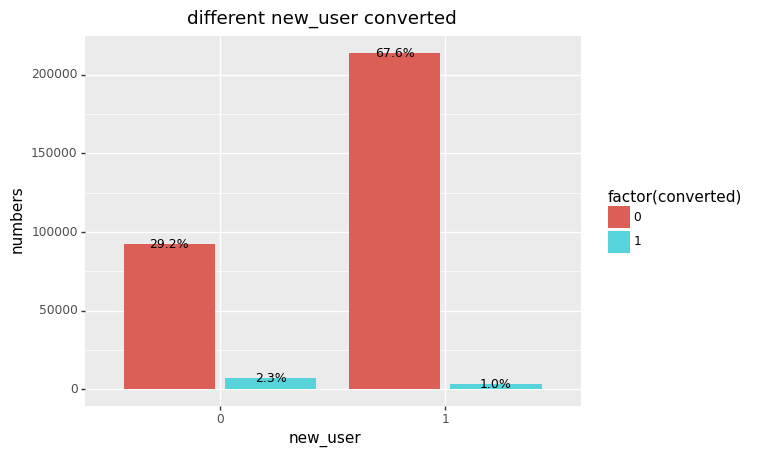

<ggplot: (8738209003721)>

In [69]:
converted_bar_chart(df, 'new_user')